In [100]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from math import pi
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats  as stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from datetime import datetime
import calendar
import os
from os import listdir
from os.path import isfile, join
import plotly.express as px

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.2f}'.format

In [101]:
df_centr = pd.read_csv('eigenvector_centrality.csv').rename(columns={'country':'Country'})

df_centr.sort_values('centrality')

,Country,centrality
116,Anguilla,0.00
141,Namibia,0.00
128,Iraq,0.00
45,Montenegro,0.00
52,Western Sahara,0.00
87,Belize,0.00
41,Laos,0.00
66,Mozambique,0.00
32,Tajikistan,0.00
5,Palestine,0.00


In [102]:
df_cases_orig = pd.read_csv('total_cases_countries_normalized.csv').rename(columns={'Name':'Country'})

df_cases = df_cases_orig[['Country', 'Day', 'DailyCases']]

df_cases

,Country,Day,DailyCases
0,Afghanistan,0,0.00
1,Afghanistan,1,0.00
2,Afghanistan,2,0.00
3,Afghanistan,3,0.00
4,Afghanistan,4,0.00
...,...,...,...
17422,Zimbabwe,135,0.00
17423,Zimbabwe,136,0.00
17424,Zimbabwe,137,5.00
17425,Zimbabwe,138,2.00


In [103]:
df_cases['ActiveCases'] = df_cases.groupby(['Country'])['DailyCases'].rolling(14).sum().reset_index(drop=True).fillna(0)

df_cases

/home/luizcelso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Day,DailyCases,ActiveCases
0,Afghanistan,0,0.00,0.00
1,Afghanistan,1,0.00,0.00
2,Afghanistan,2,0.00,0.00
3,Afghanistan,3,0.00,0.00
4,Afghanistan,4,0.00,0.00
...,...,...,...,...
17422,Zimbabwe,135,0.00,3.00
17423,Zimbabwe,136,0.00,3.00
17424,Zimbabwe,137,5.00,8.00
17425,Zimbabwe,138,2.00,10.00


In [104]:
df_potential = df_cases.merge(df_centr)

df_potential['ViralPotential'] = df_potential['ActiveCases'] * df_potential['centrality']

df_potential['ViralPotential'] = df_potential['ViralPotential']/df_potential['ViralPotential'].max()

df_potential.sort_values('ViralPotential', ascending=False).head(10)

,Country,Day,DailyCases,ActiveCases,centrality,ViralPotential
12522,United States,113,"37,289.00","426,232.00",0.15,1.00
12517,United States,108,"31,667.00","425,791.00",0.15,1.00
12518,United States,109,"30,833.00","424,199.00",0.15,1.00
12516,United States,107,"30,148.00","422,943.00",0.15,0.99
12519,United States,110,"32,922.00","422,849.00",0.15,0.99
12520,United States,111,"24,601.00","422,052.00",0.15,0.99
12515,United States,106,"26,922.00","419,898.00",0.15,0.99
12521,United States,112,"28,065.00","419,556.00",0.15,0.98
12514,United States,105,"25,023.00","417,974.00",0.15,0.98
12513,United States,104,"27,620.00","414,546.00",0.15,0.97


In [105]:
df_pct_loss = pd.read_csv('data/flights_pct_loss_week5-22.csv').rename(columns={'pais':'Country'})

df_pct_loss['Day'] = ((df_pct_loss['valor_semana']-1) * 7) + df_pct_loss['dia_semana']

df_pct_loss

,Country,valor_semana,dia_semana,voos_soma,jan_mean,pct_loss,continent,Day
0,Algeria,5,0,117.00,130.08,0.10,Africa,28
1,Algeria,5,1,174.00,130.08,-0.34,Africa,29
2,Algeria,5,2,174.00,130.08,-0.34,Africa,30
3,Algeria,5,3,177.00,130.08,-0.36,Africa,31
4,Algeria,5,4,158.00,130.08,-0.21,Africa,32
...,...,...,...,...,...,...,...,...
8540,Malta,14,5,1.00,109.77,0.99,Europe,96
8541,Morocco,22,0,2.00,110.65,0.98,Africa,147
8542,Singapore,19,6,6.00,"1,038.46",0.99,Asia,132
8543,Slovakia,11,6,2.00,49.38,0.96,Europe,76


In [106]:
df_pct_loss = df_pct_loss[['Country', 'Day', 'continent', 'pct_loss']]

df_pct_loss

,Country,Day,continent,pct_loss
0,Algeria,28,Africa,0.10
1,Algeria,29,Africa,-0.34
2,Algeria,30,Africa,-0.34
3,Algeria,31,Africa,-0.36
4,Algeria,32,Africa,-0.21
...,...,...,...,...
8540,Malta,96,Europe,0.99
8541,Morocco,147,Africa,0.98
8542,Singapore,132,Asia,0.99
8543,Slovakia,76,Europe,0.96


In [107]:
df = df_potential[['Country', 'Day', 'ViralPotential']].merge(df_pct_loss)

df

,Country,Day,ViralPotential,continent,pct_loss
0,Algeria,28,0.00,Africa,0.10
1,Algeria,29,0.00,Africa,-0.34
2,Algeria,30,0.00,Africa,-0.34
3,Algeria,31,0.00,Africa,-0.36
4,Algeria,32,0.00,Africa,-0.21
...,...,...,...,...,...
6575,United States,135,0.82,North America,0.45
6576,United States,136,0.82,North America,0.44
6577,United States,137,0.80,North America,0.43
6578,United States,138,0.79,North America,0.48


In [108]:
df.corr()

,Day,ViralPotential,pct_loss
Day,1.00,0.17,0.76
ViralPotential,0.17,1.00,0.12
pct_loss,0.76,0.12,1.00


In [109]:
pearsonr(df['ViralPotential'],df['pct_loss'])

(0.1173776792814237, 1.2651076789089367e-21)

In [110]:
df = df.sort_values(['Day', 'Country'])

fig = px.scatter(df, x="ViralPotential", y="pct_loss", animation_frame="Day", animation_group="Country",
           color="continent", hover_name="Country",
                 title='Reduction in mobility vs. Total deaths',
           range_x=[0,1], range_y=[-1,1]) #, range_x=[100,100000], range_y=[25,90]


fig.show()

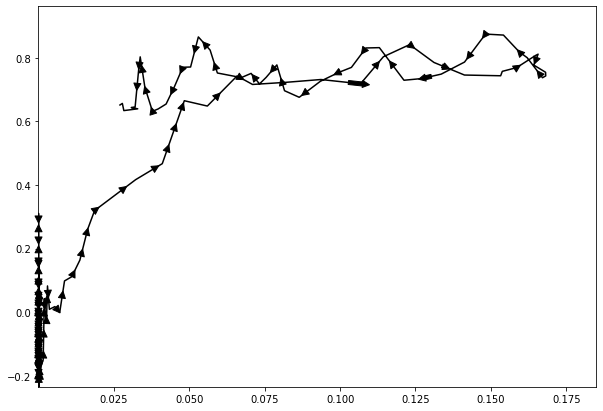

In [111]:
def arrowplot(axes, x, y, narrs=30, dspace=0.5, direc='pos', \
                          hl=0.3, hw=6, c='black'): 
    ''' narrs  :  Number of arrows that will be drawn along the curve

        dspace :  Shift the position of the arrows along the curve.
                  Should be between 0. and 1.

        direc  :  can be 'pos' or 'neg' to select direction of the arrows

        hl     :  length of the arrow head 

        hw     :  width of the arrow head        

        c      :  color of the edge and face of the arrow head  
    '''

    # r is the distance spanned between pairs of points
    r = [0]
    for i in range(1,len(x)):
        dx = x[i]-x[i-1] 
        dy = y[i]-y[i-1] 
        r.append(np.sqrt(dx*dx+dy*dy))
    r = np.array(r)

    # rtot is a cumulative sum of r, it's used to save time
    rtot = []
    for i in range(len(r)):
        rtot.append(r[0:i].sum())
    rtot.append(r.sum())

    # based on narrs set the arrow spacing
    aspace = r.sum() / narrs

    if direc is 'neg':
        dspace = -1.*abs(dspace) 
    else:
        dspace = abs(dspace)

    arrowData = [] # will hold tuples of x,y,theta for each arrow
    arrowPos = aspace*(dspace) # current point on walk along data
                                 # could set arrowPos to 0 if you want
                                 # an arrow at the beginning of the curve

    ndrawn = 0
    rcount = 1 
    while arrowPos < r.sum() and ndrawn < narrs:
        x1,x2 = x[rcount-1],x[rcount]
        y1,y2 = y[rcount-1],y[rcount]
        da = arrowPos-rtot[rcount]
        theta = np.arctan2((x2-x1),(y2-y1))
        ax = np.sin(theta)*da+x1
        ay = np.cos(theta)*da+y1
        arrowData.append((ax,ay,theta))
        ndrawn += 1
        arrowPos+=aspace
        while arrowPos > rtot[rcount+1]: 
            rcount+=1
            if arrowPos > rtot[-1]:
                break

    # could be done in above block if you want
    for ax,ay,theta in arrowData:
        # use aspace as a guide for size and length of things
        # scaling factors were chosen by experimenting a bit

        dx0 = np.sin(theta)*hl/2. + ax
        dy0 = np.cos(theta)*hl/2. + ay
        dx1 = -1.*np.sin(theta)*hl/2. + ax
        dy1 = -1.*np.cos(theta)*hl/2. + ay

        if direc is 'neg' :
          ax0 = dx0 
          ay0 = dy0
          ax1 = dx1
          ay1 = dy1 
        else:
          ax0 = dx1 
          ay0 = dy1
          ax1 = dx0
          ay1 = dy0 

        axes.annotate('', xy=(ax0, ay0), xycoords='data',
                xytext=(ax1, ay1), textcoords='data',
                arrowprops=dict( headwidth=hw, headlength=hw, ec=c, fc=c))


    axes.plot(x,y, color = c)
    axes.set_xlim(x.min()*.9,x.max()*1.1)
    axes.set_ylim(y.min()*.9,y.max()*1.1)

    
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

arrowplot(ax, df_country['ViralPotential'].values, df_country['pct_loss'].values, narrs=1*(len(df_country['ViralPotential'])), hl=0.01, direc='neg', hw=7)

# arrowplot(ax, df_country['ViralPotential'].values, df_country['pct_loss'], nArrs=4*(len(df_country['ViralPotential'])-1), mutateSize=10, color='red')
# xRng = max(x) - min(x)
# ax.set_xlim(min(x) - 0.05*xRng, max(x) + 0.05*xRng)
# yRng = max(y) - min(y)
# ax.set_ylim(min(y) - 0.05*yRng, max(y) + 0.05*yRng)
plt.show()

In [112]:
sr_top_viral = df.groupby('Country')['ViralPotential'].max().sort_values(ascending=False)

sr_top_viral.head()

Country
United States    1.00
Russia           0.33
Brazil           0.24
Spain            0.24
United Kingdom   0.17
Name: ViralPotential, dtype: float64

In [113]:
country = 'United States'

df_country = df.query("Country == @country").set_index('Day')[['ViralPotential', 'pct_loss']]

df_country

,ViralPotential,pct_loss
Day,,
28,0.00,-0.05
29,0.00,-0.09
30,0.00,-0.08
31,0.00,-0.12
32,0.00,-0.12
33,0.00,0.01
34,0.00,0.08
35,0.00,-0.05
36,0.00,-0.05


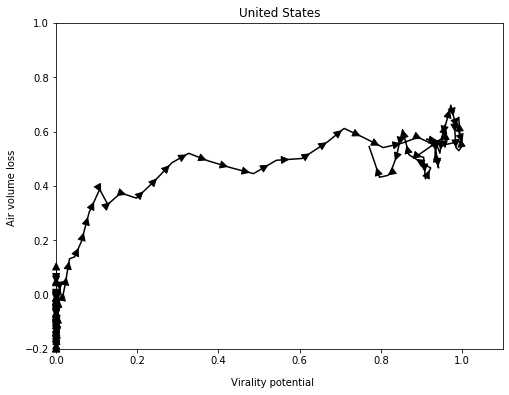

In [114]:

fig = plt.figure(figsize=(8,6))

# fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

fig.text(0.5, 0.04, 'Virality potential', ha='center')
fig.text(0.04, 0.5, 'Air volume loss', va='center', rotation='vertical')

df_country = df.query("Country == @country").set_index('Day')[['ViralPotential', 'pct_loss']]
ax = fig.add_subplot(111)
arrowplot(ax, df_country['ViralPotential'].values, df_country['pct_loss'].values, narrs=1*(len(df_country['ViralPotential'])), hl=0.01, direc='neg', hw=7)
ax.set_title(country)
ax.set_xlim([0, 1.1])
ax.set_ylim([-0.2, 1])


# plt.tight_layout(pad=4)
plt.savefig('img/virality_us.svg')
plt.show()

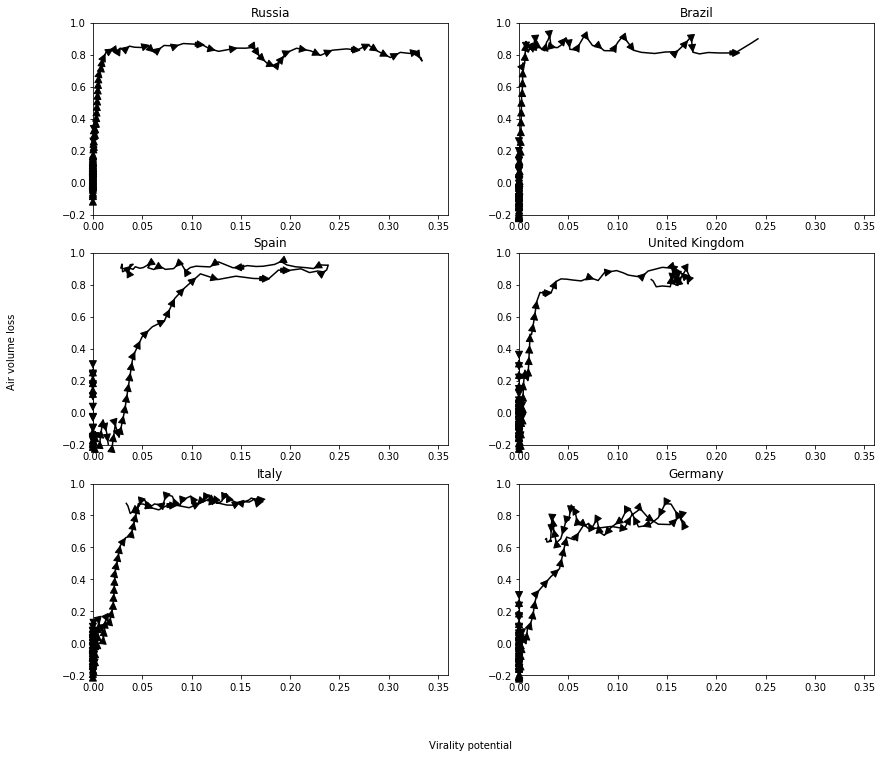

In [115]:
ntop = 6

fig = plt.figure(figsize=(14,12))

# fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

fig.text(0.5, 0.04, 'Virality potential', ha='center')
fig.text(0.04, 0.5, 'Air volume loss', va='center', rotation='vertical')

for country,num in zip(sr_top_viral.index[1:], range(1,ntop+1)):
    df_country = df.query("Country == @country").set_index('Day')[['ViralPotential', 'pct_loss']]
    ax = fig.add_subplot(3,2,num)
    arrowplot(ax, df_country['ViralPotential'].values, df_country['pct_loss'].values, narrs=1*(len(df_country['ViralPotential'])), hl=0.01, direc='neg', hw=7)
    ax.set_title(country)
    ax.set_xlim([0, 0.36])
    ax.set_ylim([-0.2, 1])


# plt.tight_layout(pad=4)
plt.savefig('img/virality_other.svg')
plt.show()